# Trip Pricing with Taxi Mobility Analytics

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data
data=pd.read_csv("C:\\Users\\LENOVO\\Desktop\\Project\\Trip Pricing with Taxi Mobility Analytics.csv")

In [3]:
#First five rows of dataset
data.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [4]:
#Last five rows of dataset
data.tail()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
131657,T0005908509,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3
131658,T0005908510,74.81,C,7.0,2.81059,C,A,0.44500,0,NaN,63,88,Male,2
131659,T0005908512,40.17,C,10.0,2.99565,B,A,3.33625,0,NaN,48,75,Female,2
131660,T0005908513,46.88,B,4.0,3.04744,A,B,4.15750,1,47.0,54,79,Male,2
131661,T0005908514,31.96,A,7.0,2.93773,A,E,2.63875,1,102.0,57,85,Male,1


In [5]:
#Checking rows and columns of dataset
data.shape

(131662, 14)

In [6]:
#Find data types of variables
data.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

In [7]:
#Check the correlation of dataset
corr=data.corr()
corr

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
Trip_Distance,1.000000,0.116812,0.509482,-0.054654,-0.007686,-0.045468,0.200456,0.231706,0.135928
Customer_Since_Months,0.116812,1.000000,0.135114,-0.050349,-0.006325,-0.009856,0.042637,0.113403,0.027827
Life_Style_Index,0.509482,0.135114,1.000000,0.205824,0.074023,-0.091307,0.234754,0.329312,-0.080108
Customer_Rating,-0.054654,-0.050349,0.205824,1.000000,0.003595,-0.010968,-0.302968,-0.227531,-0.155279
Cancellation_Last_1Month,-0.007686,-0.006325,0.074023,0.003595,1.000000,0.010953,0.095830,0.128686,0.185646
Var1,-0.045468,-0.009856,-0.091307,-0.010968,0.010953,1.000000,-0.046755,-0.061993,-0.040735
Var2,0.200456,0.042637,0.234754,-0.302968,0.095830,-0.046755,1.000000,0.683437,0.003437
Var3,0.231706,0.113403,0.329312,-0.227531,0.128686,-0.061993,0.683437,1.000000,-0.039309
Surge_Pricing_Type,0.135928,0.027827,-0.080108,-0.155279,0.185646,-0.040735,0.003437,-0.039309,1.000000


In [8]:
#Ascending order of the correlation with the target variable
corr["Surge_Pricing_Type"].sort_values(ascending=False)

Surge_Pricing_Type          1.000000
Cancellation_Last_1Month    0.185646
Trip_Distance               0.135928
Customer_Since_Months       0.027827
Var2                        0.003437
Var3                       -0.039309
Var1                       -0.040735
Life_Style_Index           -0.080108
Customer_Rating            -0.155279
Name: Surge_Pricing_Type, dtype: float64

<AxesSubplot:>

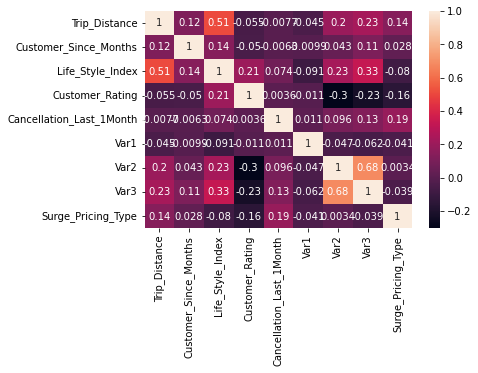

In [9]:
#Representation of the correlation matrix
sns.heatmap(data.corr(),annot=True)

In [10]:
#Drop the negatively correlated variables with  the target variable Surge_Pricing_Type
data.drop(["Trip_ID","Var1","Var3","Life_Style_Index",
           "Customer_Rating"],axis=1,inplace=True)

In [11]:
#Obtaining information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                131662 non-null  float64
 1   Type_of_Cab                  111452 non-null  object 
 2   Customer_Since_Months        125742 non-null  float64
 3   Confidence_Life_Style_Index  111469 non-null  object 
 4   Destination_Type             131662 non-null  object 
 5   Cancellation_Last_1Month     131662 non-null  int64  
 6   Var2                         131662 non-null  int64  
 7   Gender                       131662 non-null  object 
 8   Surge_Pricing_Type           131662 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 9.0+ MB


In [12]:
data.isna()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Cancellation_Last_1Month,Var2,Gender,Surge_Pricing_Type
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,True,False,True,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
131657,False,False,False,False,False,False,False,False,False
131658,False,False,False,False,False,False,False,False,False
131659,False,False,False,False,False,False,False,False,False
131660,False,False,False,False,False,False,False,False,False


In [13]:
#Finding the null values present in the data
data.isna().sum()

Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Confidence_Life_Style_Index    20193
Destination_Type                   0
Cancellation_Last_1Month           0
Var2                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

<AxesSubplot:>

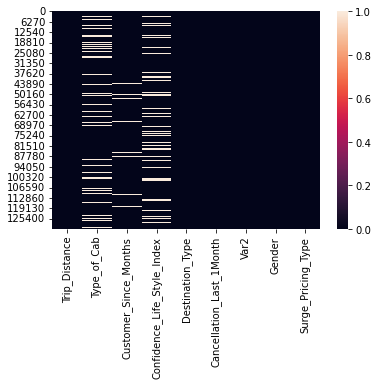

In [14]:
#Representation of the null values present in the dataset
sns.heatmap(data.isna())

In [15]:
#Since the Type_of_cab have empty columns we will replace them by the mode of the Type_of_cab column.
#Since the Customer_Since_Months have empty columns we will replace them by the mean of the Customer_Since_Months column.
#Since the Confidence_Life_Style_Index have empty columns we will replace them by the mode of the Confidence_Life_Style_Index column.

data["Type_of_Cab"].fillna(data.Type_of_Cab.mode()[0],inplace=True)
data.Customer_Since_Months.fillna(data.Customer_Since_Months.mean(),inplace=True)
data["Confidence_Life_Style_Index"].fillna(data.Confidence_Life_Style_Index.mode()[0],inplace=True)

In [16]:
data.isna().sum()

Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Confidence_Life_Style_Index    0
Destination_Type               0
Cancellation_Last_1Month       0
Var2                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

<AxesSubplot:>

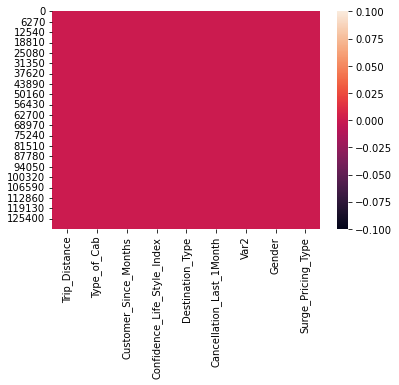

In [17]:
sns.heatmap(data.isna())

In [18]:
#List variables in the dataset
data.columns

Index(['Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Confidence_Life_Style_Index', 'Destination_Type',
       'Cancellation_Last_1Month', 'Var2', 'Gender', 'Surge_Pricing_Type'],
      dtype='object')

In [19]:
#Find the unique variables in the data set
data.nunique()

Trip_Distance                  10326
Type_of_Cab                        5
Customer_Since_Months             12
Confidence_Life_Style_Index        3
Destination_Type                  14
Cancellation_Last_1Month           9
Var2                              58
Gender                             2
Surge_Pricing_Type                 3
dtype: int64

In [20]:
#Show the categorical data
categorical=data.select_dtypes(include='object')
categorical

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
0,B,A,A,Female
1,B,B,A,Male
2,B,B,E,Male
3,C,B,A,Male
4,C,B,A,Male
...,...,...,...,...
131657,D,A,A,Male
131658,C,C,A,Male
131659,C,B,A,Female
131660,B,A,B,Male


In [21]:
#List  numerical variables in the data
numerical=data.select_dtypes(include=["int64","float64"]).columns
numerical

Index(['Trip_Distance', 'Customer_Since_Months', 'Cancellation_Last_1Month',
       'Var2', 'Surge_Pricing_Type'],
      dtype='object')

In [22]:
#List different type variables in the data
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['Cancellation_Last_1Month', 'Var2', 'Surge_Pricing_Type'], float64: ['Trip_Distance', 'Customer_Since_Months'], object: ['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type', 'Gender']}

In [23]:
#Summary of the numerical variables of data
data.describe()

,Trip_Distance,Customer_Since_Months,Cancellation_Last_1Month,Var2,Surge_Pricing_Type
count,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,0.782838,51.202800,2.155747
std,25.522882,3.544410,1.037559,4.986142,0.738164
min,0.310000,0.000000,0.000000,40.000000,1.000000
25%,24.580000,3.000000,0.000000,48.000000,2.000000
50%,38.200000,6.016661,0.000000,50.000000,2.000000
75%,60.730000,10.000000,1.000000,54.000000,3.000000
max,109.230000,10.000000,8.000000,124.000000,3.000000


# Visualization

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Surge_Pricing_Type', ylabel='Density'>

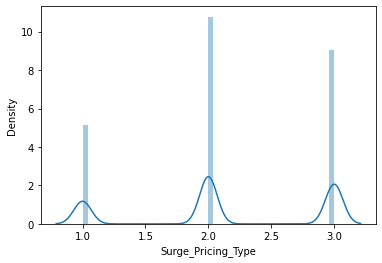

In [24]:
#Distribution of the variable 'Surge_Pricing_Type'
sns.distplot(data.Surge_Pricing_Type)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Trip_Distance', ylabel='Density'>

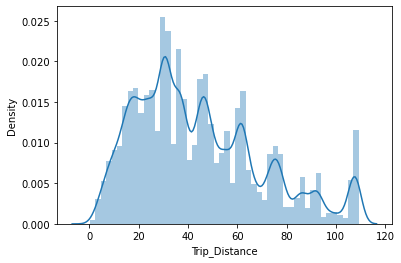

In [25]:
#Distribution of the variable 'Trip_Distance'
sns.distplot(data.Trip_Distance)

In [26]:
data['Surge_Pricing_Type'].skew()

-0.25514869039890153

In [27]:
data["Surge_Pricing_Type"].value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

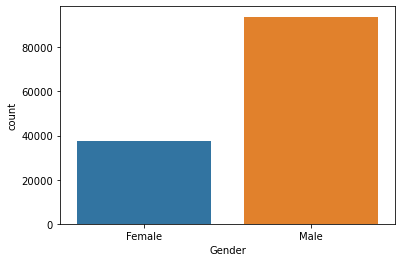

In [28]:
#Representation of the number of females and males
sns.countplot(data.Gender)

Males are more than females

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type_of_Cab', ylabel='count'>

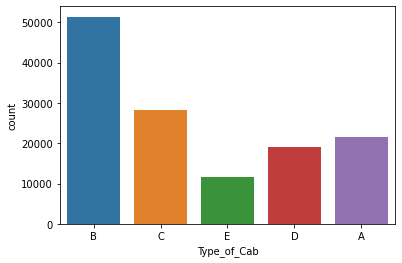

In [29]:
# Count about the 'Type_of_Cab'
sns.countplot(data.Type_of_Cab)

B is the most used Type of cab.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Confidence_Life_Style_Index', ylabel='count'>

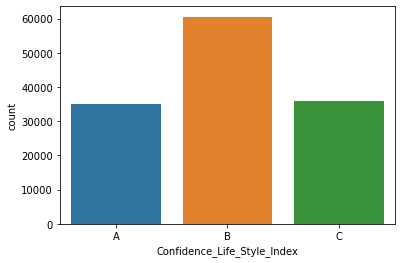

In [30]:
#Count about the 'Confidence_Life_Style_Index'
sns.countplot(data.Confidence_Life_Style_Index)

Confidence Life Style index is maximum at B and there is not much difference in A & C

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Destination_Type', ylabel='count'>

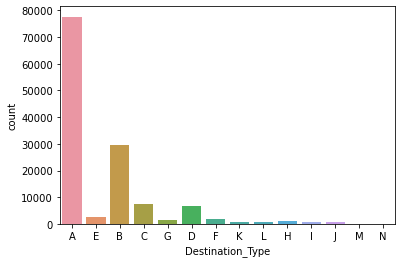

In [31]:
#Count about the Destination Type
sns.countplot(data.Destination_Type)

A is the most used Destination Type.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type_of_Cab', ylabel='Surge_Pricing_Type'>

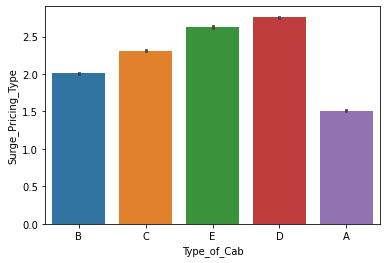

In [32]:
#Representation of the most pricing type cab
sns.barplot(data["Type_of_Cab"],data["Surge_Pricing_Type"])

Type D cab has most pricing type

# Model Building

In [33]:
import sklearn

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [36]:
#converting categorical values into numerical values
for i in range(0,data.shape[1]):
    if data.dtypes[i]=='object':
        data[data.columns[i]]=le.fit_transform(data[data.columns[i]])

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [38]:
x=data.drop("Surge_Pricing_Type",axis=1)
y=data.Surge_Pricing_Type

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105329, 8)
(26333, 8)
(105329,)
(26333,)


In [41]:
x.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Cancellation_Last_1Month,Var2,Gender
0,6.77,1,1.0,0,0,0,46,0
1,29.47,1,10.0,1,0,0,56,1
2,41.58,1,10.0,1,4,2,56,1
3,61.56,2,10.0,1,0,0,52,1
4,54.95,2,10.0,1,0,4,49,1


In [42]:
y.head()

0    2
1    2
2    2
3    3
4    2
Name: Surge_Pricing_Type, dtype: int64

In [43]:
X=sc.fit_transform(x)
X

array([[-1.46656836, -0.51255488, -1.41537818, ..., -0.75450233,
        -1.04345602, -1.57690417],
       [-0.57716698, -0.51255488,  1.12384131, ..., -0.75450233,
         0.96211041,  0.63415394],
       [-0.10268897, -0.51255488,  1.12384131, ...,  1.17310582,
         0.96211041,  0.63415394],
       ...,
       [-0.15793373,  0.33697369,  1.12384131, ..., -0.75450233,
        -0.64234273, -1.57690417],
       [ 0.10496862, -0.51255488, -0.56897168, ...,  0.20930174,
         0.56099712,  0.63415394],
       [-0.47960709, -1.36208345,  0.27743481, ...,  0.20930174,
         1.16266705,  0.63415394]])

# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr=LogisticRegression(max_iter=100,random_state=100,penalty='l2')

In [46]:
lr.fit(x_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=100)

In [47]:
pred1=lr.predict(x_test)

In [48]:
pred1[0:5]

array([2, 1, 3, 2, 3], dtype=int64)

In [49]:
y_test[0:5]

34810     2
57441     3
47816     1
115916    3
45401     3
Name: Surge_Pricing_Type, dtype: int64

In [50]:
from sklearn.metrics  import confusion_matrix,classification_report,accuracy_score

In [51]:
print(classification_report(pred1,y_test))

              precision    recall  f1-score   support

           1       0.51      0.72      0.60      3875
           2       0.75      0.62      0.68     13836
           3       0.60      0.65      0.62      8622

    accuracy                           0.65     26333
   macro avg       0.62      0.66      0.63     26333
weighted avg       0.66      0.65      0.65     26333



In [52]:
accuracy_score(pred1,y_test)

0.6458815934378916

# Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
from sklearn.metrics  import confusion_matrix,classification_report,accuracy_score

In [55]:
dc=DecisionTreeClassifier(criterion="entropy",max_depth=10,min_samples_split=4)

In [56]:
dc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=4)

In [57]:
pred2=dc.predict(x_test)

In [58]:
y_test[0:5]

34810     2
57441     3
47816     1
115916    3
45401     3
Name: Surge_Pricing_Type, dtype: int64

In [59]:
print(confusion_matrix(pred2,y_test))

[[2823  448  619]
 [2008 9546 3407]
 [ 596 1465 5421]]


In [60]:
print(classification_report(pred2,y_test))

              precision    recall  f1-score   support

           1       0.52      0.73      0.61      3890
           2       0.83      0.64      0.72     14961
           3       0.57      0.72      0.64      7482

    accuracy                           0.68     26333
   macro avg       0.64      0.70      0.66     26333
weighted avg       0.71      0.68      0.68     26333



In [61]:
accuracy_score(pred2,y_test)

0.6755781718755933

# Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf=RandomForestClassifier(n_estimators=90,max_depth=10,min_samples_split=4)

In [64]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=90)

In [65]:
pred3=rf.predict(x_test)

In [66]:
pred3[0:5]

array([2, 1, 3, 2, 3], dtype=int64)

In [67]:
y_test[0:5]

34810     2
57441     3
47816     1
115916    3
45401     3
Name: Surge_Pricing_Type, dtype: int64

In [68]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [69]:
print(confusion_matrix(pred3,y_test))

[[2845  425  578]
 [2039 9912 3647]
 [ 543 1122 5222]]


In [70]:
print(classification_report(pred3,y_test))

              precision    recall  f1-score   support

           1       0.52      0.74      0.61      3848
           2       0.86      0.64      0.73     15598
           3       0.55      0.76      0.64      6887

    accuracy                           0.68     26333
   macro avg       0.65      0.71      0.66     26333
weighted avg       0.73      0.68      0.69     26333



In [71]:
accuracy_score(pred3,y_test)

0.682755477917442

In [72]:
data["Surge_Pricing_Type"].value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

In [73]:
print((data["Surge_Pricing_Type"].value_counts()[1]/data.shape[0]*100))

20.66959335267579


In [74]:
print((data["Surge_Pricing_Type"].value_counts()[2]/data.shape[0]*100))

43.086084063738966


In [75]:
print((data["Surge_Pricing_Type"].value_counts()[3]/data.shape[0]*100))

36.244322583585245


# Gaussian NB

In [76]:
from sklearn.naive_bayes import GaussianNB

In [77]:
gs=GaussianNB()

In [78]:
gs.fit(x_train,y_train)

GaussianNB()

In [79]:
pred4=gs.predict(x_test)

In [80]:
pred4[0:5]

array([2, 1, 3, 2, 3], dtype=int64)

In [81]:
y_test[0:5]

34810     2
57441     3
47816     1
115916    3
45401     3
Name: Surge_Pricing_Type, dtype: int64

In [82]:
print(classification_report(pred4,y_test))

              precision    recall  f1-score   support

           1       0.49      0.74      0.59      3647
           2       0.78      0.63      0.69     14165
           3       0.60      0.67      0.63      8521

    accuracy                           0.66     26333
   macro avg       0.62      0.68      0.64     26333
weighted avg       0.68      0.66      0.66     26333



In [83]:
accuracy_score(pred4,y_test)

0.6556032354839935

# Bernoulli NB

In [84]:
from sklearn.naive_bayes import BernoulliNB

In [85]:
ml=BernoulliNB()

In [86]:
ml.fit(x_train,y_train)

BernoulliNB()

In [87]:
pred5=ml.predict(x_test)

In [88]:
y_test[0:5]

34810     2
57441     3
47816     1
115916    3
45401     3
Name: Surge_Pricing_Type, dtype: int64

In [89]:
print(classification_report(pred5,y_test))

              precision    recall  f1-score   support

           1       0.55      0.69      0.61      4323
           2       0.65      0.54      0.59     13898
           3       0.43      0.50      0.46      8112

    accuracy                           0.55     26333
   macro avg       0.54      0.58      0.56     26333
weighted avg       0.57      0.55      0.56     26333



In [90]:
print(confusion_matrix(pred5,y_test))

[[2986  475  862]
 [1870 7503 4525]
 [ 571 3481 4060]]


In [91]:
accuracy_score(pred5,y_test)

0.5525006645653743

# AdaBoost Classifier

In [92]:
from sklearn.ensemble import AdaBoostClassifier

In [93]:
ad=AdaBoostClassifier(n_estimators=100)

In [94]:
ad.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [95]:
pred6=ad.predict(x_test)

In [96]:
y_test[0:5]

34810     2
57441     3
47816     1
115916    3
45401     3
Name: Surge_Pricing_Type, dtype: int64

In [97]:
print(classification_report(pred6,y_test))

              precision    recall  f1-score   support

           1       0.54      0.73      0.62      3991
           2       0.81      0.64      0.72     14416
           3       0.60      0.71      0.65      7926

    accuracy                           0.68     26333
   macro avg       0.65      0.70      0.66     26333
weighted avg       0.70      0.68      0.68     26333



In [98]:
accuracy_score(pred6,y_test)

0.6772870542665097

# K Neighbors Classifier

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train,y_train)
knn_predictions = knn_classifier.predict(x_test)

In [101]:
accuracy_score(knn_predictions,y_test)

0.5734249800630388

In [102]:
!pip install lightgbm
!pip install xgboost

# Gradient Boosting Classifier 

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

In [104]:
xg=GradientBoostingClassifier()

In [105]:
xg.fit(x_train,y_train)

GradientBoostingClassifier()

In [106]:
pred7=xg.predict(x_test)

In [107]:
print(confusion_matrix(pred7,y_test))

[[2840  422  577]
 [2025 9748 3469]
 [ 562 1289 5401]]


In [108]:
print(accuracy_score(pred7,y_test))

0.6831352295598678


# Light GBM Classifier

In [109]:
import lightgbm as lgb

In [110]:
clf=lgb.LGBMClassifier()
clf.fit(x_train, y_train)

LGBMClassifier()

In [111]:
pred8=clf.predict(x_test)

In [112]:
print(confusion_matrix(pred8,y_test))

[[2819  420  563]
 [2022 9689 3396]
 [ 586 1350 5488]]


In [113]:
print(accuracy_score(pred8,y_test))

0.683401055709566
